# Ładowanie danych - ARP Poisoning and Flood

Żródło: https://data.mendeley.com/datasets/yxzh9fbvbj/2
Ahuja, Nisha; Singal, Gaurav; Mukhopadhyay, Debajyoti (2022), “ARP Poisoning and Flood attack in SDN”, Mendeley Data, V2, doi: 10.17632/yxzh9fbvbj.2

In [ ]:
import pandas as pd

df = pd.read_csv('arp-poison-flood.csv')

In [ ]:
df.head()

,switch_id,in_port,outport,src_mac_addr(eth),src_mac_addr(arp),dst_mac_addr(eth),dst_mac_addr(arp),src_ip(arp),dst_ip(arp),op_code(arp),packet_in_count,Protocol,Pkt loss,rtt (avg),total_time,Label
0,5,1,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1707,0,0,0.0,306446,0
1,2,3,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1708,0,0,0.0,306446,0
2,4,4,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1709,0,0,0.0,306446,0
3,3,4,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1710,0,0,0.0,306446,0
4,1,1,4294967291,00:00:00:00:00:07,00:00:00:00:00:07,ff:ff:ff:ff:ff:ff,00:00:00:00:00:00,10.0.0.7,10.0.0.12,1,1711,0,0,0.0,306446,0


In [ ]:
df.describe()

,switch_id,in_port,outport,op_code(arp),packet_in_count,Protocol,Pkt loss,rtt (avg),total_time,Label
count,134000.000000,134000.000000,1.340000e+05,134000.000000,134000.000000,134000.000000,134000.000000,134000.000000,1.340000e+05,134000.000000
mean,6.439604,3.190022,2.996541e+09,1.158112,38854.309813,0.003791,74.855224,0.011978,6.086558e+06,1.436149
std,3.793212,1.191286,1.972515e+09,0.382190,27955.590651,0.061455,43.384697,0.085225,1.372583e+07,0.865346
min,1.000000,1.000000,1.000000e+00,1.000000,1667.000000,0.000000,0.000000,0.000000,3.012470e+05,0.000000
25%,3.000000,2.000000,4.000000e+00,1.000000,14709.000000,0.000000,0.000000,0.000000,1.028649e+06,0.000000
50%,6.000000,4.000000,4.294967e+09,1.000000,29702.000000,0.000000,100.000000,0.000000,1.028649e+06,2.000000
75%,10.000000,4.000000,4.294967e+09,1.000000,62417.250000,0.000000,100.000000,0.000000,1.028649e+06,2.000000
max,13.000000,4.000000,4.294967e+09,4.000000,96543.000000,1.000000,100.000000,1.374000,4.712558e+07,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134000 entries, 0 to 133999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   switch_id          134000 non-null  int64  
 1   in_port            134000 non-null  int64  
 2   outport            134000 non-null  int64  
 3   src_mac_addr(eth)  134000 non-null  object 
 4   src_mac_addr(arp)  133468 non-null  object 
 5   dst_mac_addr(eth)  134000 non-null  object 
 6   dst_mac_addr(arp)  133467 non-null  object 
 7   src_ip(arp)        134000 non-null  object 
 8   dst_ip(arp)        134000 non-null  object 
 9   op_code(arp)       134000 non-null  int64  
 10  packet_in_count    134000 non-null  int64  
 11  Protocol           134000 non-null  int64  
 12  Pkt loss           134000 non-null  int64  
 13  rtt (avg)          134000 non-null  float64
 14  total_time         134000 non-null  int64  
 15  Label              134000 non-null  int64  
dtypes:

# Wstępna obróbka danych

## Usuwanie duplikatów

In [ ]:
length_before_dropna = len(df)
df = df.drop_duplicates()
print(f"Dropped rows: {length_before_dropna - len(df)}\n")
df.info()

Dropped rows: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134000 entries, 0 to 133999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   switch_id          134000 non-null  int64  
 1   in_port            134000 non-null  int64  
 2   outport            134000 non-null  int64  
 3   src_mac_addr(eth)  134000 non-null  object 
 4   src_mac_addr(arp)  133468 non-null  object 
 5   dst_mac_addr(eth)  134000 non-null  object 
 6   dst_mac_addr(arp)  133467 non-null  object 
 7   src_ip(arp)        134000 non-null  object 
 8   dst_ip(arp)        134000 non-null  object 
 9   op_code(arp)       134000 non-null  int64  
 10  packet_in_count    134000 non-null  int64  
 11  Protocol           134000 non-null  int64  
 12  Pkt loss           134000 non-null  int64  
 13  rtt (avg)          134000 non-null  float64
 14  total_time         134000 non-null  int64  
 15  Label              134000 non-null

## Usuwanie pustych wartości

In [ ]:
length_before_dropna = len(df)
df = df.dropna()
print(f"Dropped rows: {length_before_dropna - len(df)}\n")
df.info()

Dropped rows: 533

<class 'pandas.core.frame.DataFrame'>
Index: 133467 entries, 0 to 133999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   switch_id          133467 non-null  int64  
 1   in_port            133467 non-null  int64  
 2   outport            133467 non-null  int64  
 3   src_mac_addr(eth)  133467 non-null  object 
 4   src_mac_addr(arp)  133467 non-null  object 
 5   dst_mac_addr(eth)  133467 non-null  object 
 6   dst_mac_addr(arp)  133467 non-null  object 
 7   src_ip(arp)        133467 non-null  object 
 8   dst_ip(arp)        133467 non-null  object 
 9   op_code(arp)       133467 non-null  int64  
 10  packet_in_count    133467 non-null  int64  
 11  Protocol           133467 non-null  int64  
 12  Pkt loss           133467 non-null  int64  
 13  rtt (avg)          133467 non-null  float64
 14  total_time         133467 non-null  int64  
 15  Label              133467 non-null  i

## Usuwanie redundantnych kolumn

In [ ]:
df = df.drop(columns=['src_mac_addr(eth)'])
df = df.drop(columns=['dst_mac_addr(eth)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133467 entries, 0 to 133999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   switch_id          133467 non-null  int64  
 1   in_port            133467 non-null  int64  
 2   outport            133467 non-null  int64  
 3   src_mac_addr(arp)  133467 non-null  object 
 4   dst_mac_addr(arp)  133467 non-null  object 
 5   src_ip(arp)        133467 non-null  object 
 6   dst_ip(arp)        133467 non-null  object 
 7   op_code(arp)       133467 non-null  int64  
 8   packet_in_count    133467 non-null  int64  
 9   Protocol           133467 non-null  int64  
 10  Pkt loss           133467 non-null  int64  
 11  rtt (avg)          133467 non-null  float64
 12  total_time         133467 non-null  int64  
 13  Label              133467 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 15.3+ MB


## Enkodowanie nienumerycznych wartości

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

for column in df.select_dtypes(include=['object']):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    print(f"Column {column} encoded")

df.info()

Column src_mac_addr(arp) encoded
Column dst_mac_addr(arp) encoded
Column src_ip(arp) encoded
Column dst_ip(arp) encoded
<class 'pandas.core.frame.DataFrame'>
Index: 133467 entries, 0 to 133999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   switch_id          133467 non-null  int64  
 1   in_port            133467 non-null  int64  
 2   outport            133467 non-null  int64  
 3   src_mac_addr(arp)  133467 non-null  int64  
 4   dst_mac_addr(arp)  133467 non-null  int64  
 5   src_ip(arp)        133467 non-null  int64  
 6   dst_ip(arp)        133467 non-null  int64  
 7   op_code(arp)       133467 non-null  int64  
 8   packet_in_count    133467 non-null  int64  
 9   Protocol           133467 non-null  int64  
 10  Pkt loss           133467 non-null  int64  
 11  rtt (avg)          133467 non-null  float64
 12  total_time         133467 non-null  int64  
 13  Label              133467 non-null

## Skalowanie numerycznych wartości

`StandardScaler` to technika przetwarzania wstępnego danych, która służy do standaryzacji cech poprzez usunięcie średniej i przeskalowanie ich do jednostkowej wariancji. Ten proces jest istotny, zwłaszcza dla algorytmów wrażliwych na skalę cech, takich jak algorytmy oparte na spadku gradientu, maszyny wektorów nośnych i algorytm k-najbliższych sąsiadów.

In [ ]:
columns_to_scale = [col for col in df.columns if col != 'Label']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()

,switch_id,in_port,outport,src_mac_addr(arp),dst_mac_addr(arp),src_ip(arp),dst_ip(arp),op_code(arp),packet_in_count,Protocol,Pkt loss,rtt (avg),total_time,Label,Cluster
0,-0.381006,-1.840965,0.653917,-1.037247,-0.341787,-1.023716,-2.147982,-0.419614,-1.333482,-0.004741,-1.73367,-0.132651,-0.421695,0,-1.2608
1,-1.171822,-0.161295,0.653917,-1.037247,-0.341787,-1.023716,-2.147982,-0.419614,-1.333446,-0.004741,-1.73367,-0.132651,-0.421695,0,-1.2608
2,-0.644612,0.678541,0.653917,-1.037247,-0.341787,-1.023716,-2.147982,-0.419614,-1.333410,-0.004741,-1.73367,-0.132651,-0.421695,0,-1.2608
3,-0.908217,0.678541,0.653917,-1.037247,-0.341787,-1.023716,-2.147982,-0.419614,-1.333374,-0.004741,-1.73367,-0.132651,-0.421695,0,-1.2608
4,-1.435427,-1.840965,0.653917,-1.037247,-0.341787,-1.023716,-2.147982,-0.419614,-1.333338,-0.004741,-1.73367,-0.132651,-0.421695,0,-1.2608


# K-means clustering

* usunięcie kolumny `Label` na czas treningu
* użycie PCA dla zredukowania wymiarów do 2
* K-means clustering
* przypisanie wyników do kolumny `Cluster`

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


labels = df['Label']
df_train = df.drop(columns=['Label'])

# Use PCA
pca = PCA(n_components=2)
pca.fit(df_train)
principal_components = pca.components_
df_train = pca.transform(df_train)


# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_train)
df['Cluster'] = kmeans.labels_
df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,switch_id,in_port,outport,src_mac_addr(arp),dst_mac_addr(arp),src_ip(arp),dst_ip(arp),op_code(arp),packet_in_count,Protocol,Pkt loss,rtt (avg),total_time,Label,Cluster
0,-0.381006,-1.840965,0.653917,-1.037247,-0.341787,-1.023716,-2.147982,-0.419614,-1.333482,-0.004741,-1.73367,-0.132651,-0.421695,0,0
1,-1.171822,-0.161295,0.653917,-1.037247,-0.341787,-1.023716,-2.147982,-0.419614,-1.333446,-0.004741,-1.73367,-0.132651,-0.421695,0,0
2,-0.644612,0.678541,0.653917,-1.037247,-0.341787,-1.023716,-2.147982,-0.419614,-1.333410,-0.004741,-1.73367,-0.132651,-0.421695,0,0
3,-0.908217,0.678541,0.653917,-1.037247,-0.341787,-1.023716,-2.147982,-0.419614,-1.333374,-0.004741,-1.73367,-0.132651,-0.421695,0,0
4,-1.435427,-1.840965,0.653917,-1.037247,-0.341787,-1.023716,-2.147982,-0.419614,-1.333338,-0.004741,-1.73367,-0.132651,-0.421695,0,2


## Użycie najlepszego mappingu `Cluster` -> `Label`

In [ ]:
import itertools
import pandas as pd
from sklearn.metrics import accuracy_score

clusters = sorted(df['Cluster'].unique())
labels = sorted(df['Label'].unique())

possible_mappings = list(itertools.permutations(labels))

best_accuracy = 0
best_mapping = None

for mapping in possible_mappings:
    mapped_labels = df['Cluster'].map(dict(zip(clusters, mapping)))
    accuracy = accuracy_score(df['Label'], mapped_labels)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_mapping = mapping

print("Best Mapping:", best_mapping)

best_mapping = {cluster: label for cluster, label in zip(clusters, best_mapping)}
df['Cluster'] = df['Cluster'].map(best_mapping)

accuracy_after_mapping = accuracy_score(df['Label'], df['Cluster'])

print("Accuracy after mapping:", accuracy_after_mapping)


Best Mapping: (0, 2, 1)
Best Accuracy: 0.7873257059797553
Accuracy after mapping: 0.7873257059797553


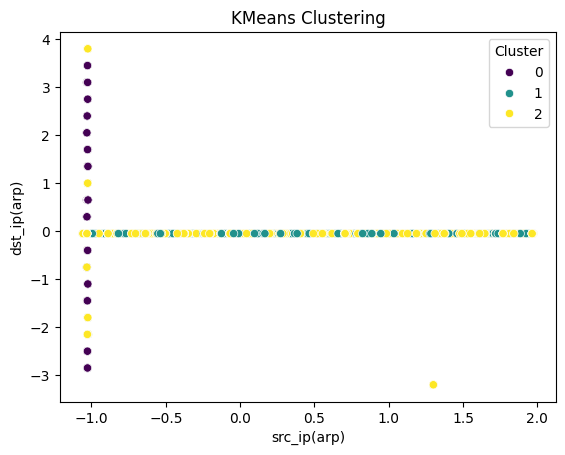

In [ ]:
sns.scatterplot(data=df, x='src_ip(arp)', y='dst_ip(arp)', hue='Cluster', palette='viridis')
plt.title('KMeans Clustering')
plt.show()

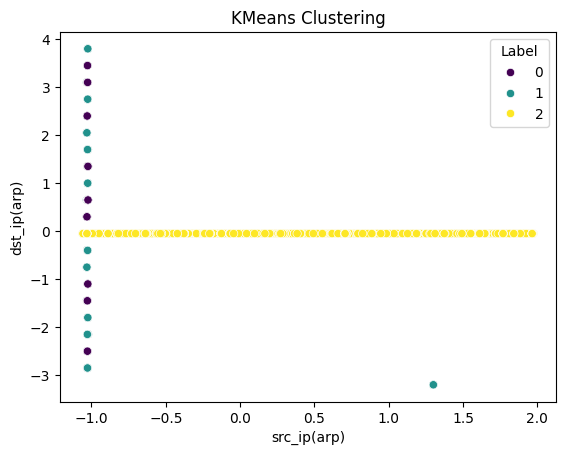

In [ ]:
sns.scatterplot(data=df, x='src_ip(arp)', y='dst_ip(arp)', hue='Label', palette='viridis')
plt.title('KMeans Clustering')
plt.show()